<a href="https://colab.research.google.com/github/TheDenk/augmixations/blob/master/examples/cutmix_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install augmixations

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from augmixations import cutmix

##Help functions

In [3]:
def show_img(image, figsize=(4, 6), title=None):
    img = image.copy()
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=figsize)
    plt.title(title)
    plt.imshow(img)
    plt.axis(False)
    plt.show()

def create_img_with_rect(img_h=500, img_w=500, x1=200, y1=200, x2=300, y2=300, color=(80, 80, 80)):
    label = 'rectangle'
    img = np.ones((img_h, img_w, 3), dtype=np.uint8)*230
    img = cv2.rectangle(img, (x1, y1), (x2, y2), color, -1)
    return img, np.array([np.array([x1, y1, x2, y2])]), np.array([label])

def create_img_with_circle(img_h=500, img_w=500, xc=250, yc=250,r=100, color=(150, 150, 150)):
    label = 'circle'
    img = np.ones((img_h, img_w, 3), dtype=np.uint8)*255
    img = cv2.circle(img, (xc, yc), r, color, -1)
    return img, np.array([np.array([xc -  r, xc - r, xc + r, xc + r])]), np.array([label])

def draw_boxes(new_img, boxes, labels):
    frame = new_img.copy()
    
    for (x1, y1, x2, y2), label in zip(boxes, labels): 
        thickness = 1
        font_scale = 0.7
    
        frame = cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 3)
        frame = cv2.putText(frame, label, (int(x1), int(y1 - 15)), cv2.FONT_HERSHEY_SIMPLEX ,  
                                   font_scale, (0, 255, 0), thickness, cv2.LINE_AA) 
        
    return frame

##Create images

In [4]:
img_1, boxes_1, labels_1 = create_img_with_rect()
img_2, boxes_2, labels_2 = create_img_with_circle()

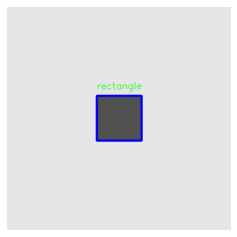

In [5]:
img_1_marks = draw_boxes(img_1, boxes_1, labels_1)
show_img(img_1_marks)

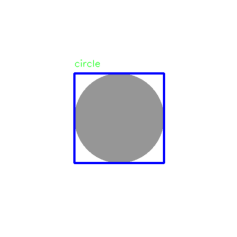

In [6]:
img_2_marks = draw_boxes(img_2, boxes_2, labels_2)
show_img(img_2_marks)

##Simple usage

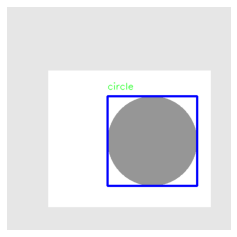

In [7]:
new_img, new_boxes, new_labels = cutmix(
                            img_1, 
                            boxes_1,
                            labels_1,
                            
                            img_2, 
                            boxes_2,
                            labels_2,
                           )

img_with_rect = draw_boxes(new_img, new_boxes, new_labels)
show_img(img_with_rect)

##Advanced usage (with configs)

In [8]:
crop_x = 100
crop_y = 100
rect_h = 200
rect_w = 200
insert_x = 70
insert_y = 70

crop_rect_config = {
    'crop_min_x' : crop_x,
    'crop_max_x' : crop_x + 1,
    
    'crop_min_y' : crop_y,
    'crop_max_y' : crop_y + 1,
                 
    'min_rect_h' : rect_h, 
    'max_rect_h' : rect_h + 1, 
    
    'min_rect_w' : rect_w,      
    'max_rect_w' : rect_w + 1,
    
    'insert_min_x' : insert_x,
    'insert_max_x' : insert_x + 1,
    
    'insert_min_y' : insert_y,
    'insert_max_y' : insert_y + 1,
}

process_box_config = {
    'max_overlap_area_ratio': 0.75,

    'min_height_result_ratio': 0.25,
    'min_width_result_ratio': 0.25,

    'max_height_intersection': 0.9,
    'max_width_intersection': 0.9,
}

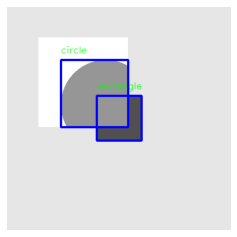

In [9]:
new_img, new_boxes, new_labels = cutmix(
                            img_1, 
                            boxes_1,
                            labels_1,
                            
                            img_2, 
                            boxes_2,
                            labels_2,
                            
                            crop_rect_config = crop_rect_config,
                            process_boxes_config = process_box_config,
                           )

img_with_rect = draw_boxes(new_img, new_boxes, new_labels)
show_img(img_with_rect)